#**Getting the data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path="/content/drive/MyDrive/ML/ml-for-oceanography"

In [3]:
import os

files=os.listdir(path)
files

['sample2.csv', 'test1.csv', 'train.csv']

In [4]:
import pandas as pd

train_df= pd.read_csv(path+"/"+files[2])
test_df= pd.read_csv(path+"/"+files[1])

In [5]:
train_df.tail(3)

,ID,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
3883,2019628340,2019,6,28,3,40,169,2.0,3.8,3.45,2.88,320,1020.6,15.2,12.3,13.4,0.35
3884,2019628440,2019,6,28,4,40,203,4.2,4.9,3.70,2.96,310,1020.8,14.5,12.3,13.3,0.25
3885,20196281840,2019,6,28,18,40,173,5.9,7.2,2.35,2.37,354,1018.4,15.3,12.2,14.3,0.25


In [6]:
test_df.head(3)

,ID,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC)
0,2019722240,2019,7,2,22,40,340,6.7,8.2,2.35,2.37,177,1011.5,18.6,16.8,17.8
1,2019722340,2019,7,2,23,40,15,2.3,5.5,2.60,2.44,336,1010.7,19.0,16.9,17.8
2,201973140,2019,7,3,1,40,11,1.6,2.7,3.13,2.95,341,1010.6,17.9,16.7,17.3


In [7]:
train_df_1=train_df.drop(["ID"], axis=1)
train_df_1.head(3)

,#YY,MM,DD,hh,mm,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
0,2017,4,24,1,50,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2017,4,24,2,50,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,2017,4,24,3,50,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90


In [8]:
import numpy as np

date_time=train_df_1[["#YY", "MM", "DD", "hh", "mm"]].values
y, m, d, h, min=[], [], [], [], []

for i in date_time:
  y.append(i[0])
  m.append(i[1])
  d.append(i[2])
  h.append(i[3])
  min.append(i[4])

y, m, d, h, min=np.array(y), np.array(m), np.array(d), np.array(h), np.array(min)

In [9]:
train_df_1[["#YY", "MM", "DD", "hh", "mm"]].values

array([[2017,    4,   24,    1,   50],
       [2017,    4,   24,    2,   50],
       [2017,    4,   24,    3,   50],
       ...,
       [2019,    6,   28,    3,   40],
       [2019,    6,   28,    4,   40],
       [2019,    6,   28,   18,   40]])

In [10]:
from datetime import datetime

date_time_col=[]
for i in range(len(y)):
  date_time_col.append(datetime(y[i], m[i], d[i], h[i], min[i]))

date_time_col=np.array(date_time_col)
train_df_1["date_time"]= date_time_col
train_df_1=train_df_1.drop(["#YY", "MM", "DD", "hh", "mm"], axis=1)
train_df_1=train_df_1.set_index("date_time")

In [11]:
train_df_1.head(3)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
date_time,,,,,,,,,,,
2017-04-24 01:50:00,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
2017-04-24 02:50:00,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2017-04-24 03:50:00,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90


##**Correlation**

In [12]:
import numpy as np

def scale(df):
  df_1=df.copy()
  for i in df_1:
    j=np.array(df_1[str(i)].values)
    j= (j-np.min(j))/(np.max(j)-np.min(j))
    df_1[str(i)]=j
  return df_1

In [13]:
train_df_1_labels=train_df_1["WVHT(m)"]
train_df_1=train_df_1.drop(["WVHT(m)"], axis=1)
train_df_1_scaled=scale(train_df_1)

In [14]:
train_df_1_scaled.head(3)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC)
date_time,,,,,,,,,,
2017-04-24 01:50:00,0.061281,0.222222,0.204819,0.132546,0.298851,0.969444,0.701299,0.053942,0.073394,0.301471
2017-04-24 02:50:00,0.080780,0.214815,0.186747,0.204068,0.551724,0.994444,0.693506,0.049793,0.059633,0.297794
2017-04-24 03:50:00,1.000000,0.162963,0.138554,0.244751,0.718391,0.030556,0.680519,0.049793,0.055046,0.301471


In [15]:
train_df_1_scaled= pd.concat([train_df_1_scaled, train_df_1_labels], axis=1)
train_df_1_scaled.head(3)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
date_time,,,,,,,,,,,
2017-04-24 01:50:00,0.061281,0.222222,0.204819,0.132546,0.298851,0.969444,0.701299,0.053942,0.073394,0.301471,0.39
2017-04-24 02:50:00,0.080780,0.214815,0.186747,0.204068,0.551724,0.994444,0.693506,0.049793,0.059633,0.297794,0.65
2017-04-24 03:50:00,1.000000,0.162963,0.138554,0.244751,0.718391,0.030556,0.680519,0.049793,0.055046,0.301471,0.90


In [16]:
train_df_1_scaled.describe()

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)
count,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000,3886.000000
mean,0.451398,0.425019,0.400699,0.134845,0.355894,0.380688,0.574896,0.493548,0.520424,0.609500,0.641372
std,0.315613,0.176719,0.171645,0.067657,0.167985,0.303068,0.148903,0.265984,0.337518,0.222961,0.372959
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,0.144847,0.296296,0.277108,0.085302,0.227011,0.091667,0.483117,0.232365,0.151376,0.423713,0.360000
50%,0.461003,0.414815,0.385542,0.121391,0.330460,0.383333,0.574026,0.568465,0.614679,0.643382,0.520000
75%,0.713092,0.540741,0.510542,0.171260,0.459770,0.533333,0.672727,0.726141,0.839450,0.801471,0.810000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.630000


In [17]:
corr=train_df_1_scaled.corr()
corr["WVHT(m)"].sort_values(ascending= False) #since we are only interested in how other values affect the sig height

WVHT(m)       1.000000
APD(sec)      0.854101
DPD(sec)      0.735568
GST(m/s)      0.691531
WSPD(m/s)     0.676804
WTMP(degC)    0.033039
PRES(hPa)    -0.000905
ATMP(degC)   -0.071976
WDIR(degT)   -0.072296
DEWP(degC)   -0.141361
MWD(degT)    -0.164750
Name: WVHT(m), dtype: float64

##**Callbacks**

In [18]:
import tensorflow as tf

def early_stop():
  callback=tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights= True)
  return callback

def reduce_lr():
  callback=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=3)
  return callback

##**Split data**

In [19]:
#data=train_df_1_scaled.sample(len(train_df_1)) #shuffle
data=train_df_1_scaled

In [20]:
train, test= data[:int(len(train_df_1)*0.8)], data[int(len(train_df_1)*0.8):]
len(train), len(test)

(3108, 778)

In [21]:
train_data, test_data= train.drop(["WVHT(m)"], axis=1), test.drop(["WVHT(m)"], axis=1)
train_labels, test_labels= train["WVHT(m)"], test["WVHT(m)"]

In [22]:
import tensorflow as tf

train_dataset= tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(512).prefetch(tf.data.AUTOTUNE)
test_dataset= tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(512).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 10), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

#**Models**

##**Model_1:**MLP

In [23]:
def build_model(hp):
  model=tf.keras.Sequential()

  #optimizing the units
  hp_units_1=hp.Int("units_1", min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_1, activation="relu"))
  hp_units_2=hp.Int("units_2", min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_2, activation="relu"))
  hp_units_3=hp.Int("units_3", min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_3, activation="relu"))
  hp_units_4=hp.Int("units_4", min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_4, activation="relu"))
  hp_units_5=hp.Int("units_5", min_value=32, max_value=512, step=32)
  model.add(tf.keras.layers.Dense(units=hp_units_5, activation="relu"))
  # hp_units_6=hp.Int("units_6", min_value=32, max_value=512, step=32)
  # model.add(tf.keras.layers.Dense(units=hp_units_6, activation="relu"))
  # hp_units_7=hp.Int("units_7", min_value=32, max_value=512, step=32)
  # model.add(tf.keras.layers.Dense(units=hp_units_7, activation="relu"))
  # hp_units_8=hp.Int("units_8", min_value=32, max_value=512, step=32)
  # model.add(tf.keras.layers.Dense(units=hp_units_8, activation="relu"))
  #model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(1, activation="linear"))

  #optimizing lr
  hp_lr= hp.Choice("lr", values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_lr),
                loss="mse",
                metrics=["mse"])
  
  return model

In [24]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 KB 10.7 MB/s eta 0:00:00


In [25]:
import keras_tuner as kt

tuner= kt.Hyperband(build_model,
                    objective="val_loss",
                    max_epochs=100,
                    factor=3)

In [26]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(train_dataset, epochs=50, validation_data=(test_dataset), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

best_u1, best_u2, best_u3, best_u4, best_u5= best_hps.get('units_1'), best_hps.get('units_2'), best_hps.get('units_3'), best_hps.get('units_4'), best_hps.get("units_5")#, best_hps.get("units_6"), best_hps.get("units_7"), best_hps.get("units_8")

print("hyper-parameter training completed")
print(f"\nunits Layer_1:{best_hps.get('units_1')}\nunits Layer_2:{best_hps.get('units_2')}\nunits Layer_3:{best_hps.get('units_3')}\nunits Layer_4:{best_hps.get('units_4')}\nunits Layer_5:{best_hps.get('units_5')}")
print(f"LR:{best_hps.get('lr')}")

Trial 254 Complete [00h 00m 10s]
val_loss: 0.01322860922664404

Best val_loss So Far: 0.0108778802677989
Total elapsed time: 00h 16m 18s
hyper-parameter training completed

units Layer_1:416
units Layer_2:384
units Layer_3:320
units Layer_4:160
units Layer_5:288
LR:0.001


In [27]:
model_mlp=tuner.hypermodel.build(best_hps)

history_mlp= model_mlp.fit(train_dataset,
                       epochs=100,
                       validation_data=(test_dataset),
                       verbose=0,
                       )

val_loss_per_epoch= history_mlp.history["val_loss"]
best_epoch=  val_loss_per_epoch.index(np.min(val_loss_per_epoch))+1
print("Best epoch:", best_epoch)

Best epoch: 93


In [28]:
model_mlp_best=tf.keras.Sequential([tf.keras.layers.Dense(best_u1, activation="relu"),
                             tf.keras.layers.Dense(best_u2, activation="relu"),
                             #tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(best_u3, activation="relu"),
                             tf.keras.layers.Dense(best_u4, activation="relu"),
                             #tf.keras.layers.Dropout(0.1),
                             tf.keras.layers.Dense(best_u5, activation="relu"),                             #4layers performed better
                            #  tf.keras.layers.Dense(best_u6, activation="relu"),
                            #  tf.keras.layers.Dense(best_u7, activation="relu"),
                            #  tf.keras.layers.Dense(best_u8, activation="relu"),
                             tf.keras.layers.Dense(1, activation="linear")],name="MLP_best")

model_mlp_best.compile(loss="mse",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [29]:
history_1_best=model_mlp_best.fit(train_dataset,
                      epochs=best_epoch,
                      shuffle=False,
                      validation_data=(test_dataset),
                      verbose=2,
                      callbacks=[early_stop(),
                                 reduce_lr()])

model_mlp_best.evaluate(test_dataset)

Epoch 1/93
7/7 - 5s - loss: 0.3176 - root_mean_squared_error: 0.5636 - val_loss: 0.0678 - val_root_mean_squared_error: 0.2605 - lr: 0.0010 - 5s/epoch - 711ms/step
Epoch 2/93
7/7 - 0s - loss: 0.1252 - root_mean_squared_error: 0.3538 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1859 - lr: 0.0010 - 84ms/epoch - 12ms/step
Epoch 3/93
7/7 - 0s - loss: 0.0690 - root_mean_squared_error: 0.2627 - val_loss: 0.0358 - val_root_mean_squared_error: 0.1893 - lr: 0.0010 - 91ms/epoch - 13ms/step
Epoch 4/93
7/7 - 0s - loss: 0.0363 - root_mean_squared_error: 0.1905 - val_loss: 0.1106 - val_root_mean_squared_error: 0.3326 - lr: 0.0010 - 62ms/epoch - 9ms/step
Epoch 5/93
7/7 - 0s - loss: 0.0781 - root_mean_squared_error: 0.2795 - val_loss: 0.0209 - val_root_mean_squared_error: 0.1445 - lr: 0.0010 - 89ms/epoch - 13ms/step
Epoch 6/93
7/7 - 0s - loss: 0.0537 - root_mean_squared_error: 0.2318 - val_loss: 0.0183 - val_root_mean_squared_error: 0.1354 - lr: 0.0010 - 84ms/epoch - 12ms/step
Epoch 7/93
7/7 - 0

[0.011161455884575844, 0.10564778745174408]

**Plotting the results**

In [30]:
import matplotlib.pyplot as plt
def plot(pred):
  index=test_labels.index.values
  pred=pred.squeeze()
  df_mlp=pd.DataFrame({"WVHT(m)_p":pred, "date_time":index})
  df_mlp=df_mlp.set_index("date_time")
  df_mlp=pd.concat([test_labels, df_mlp], axis=1)
  df_mlp.plot(figsize=(10,7))
  plt.show();

25/25 [==============================] - 0s 3ms/step


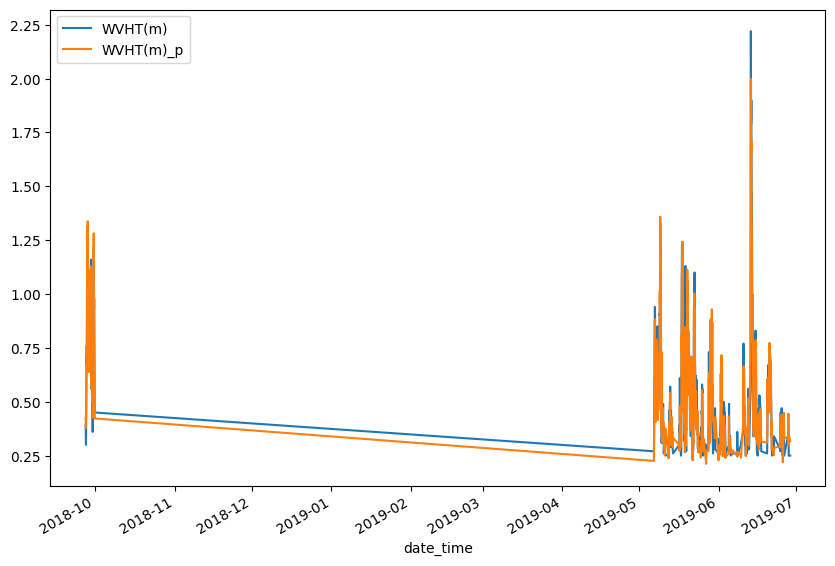

In [31]:
plot(model_mlp_best.predict(test_data))

##**Model_2**:Time series approach

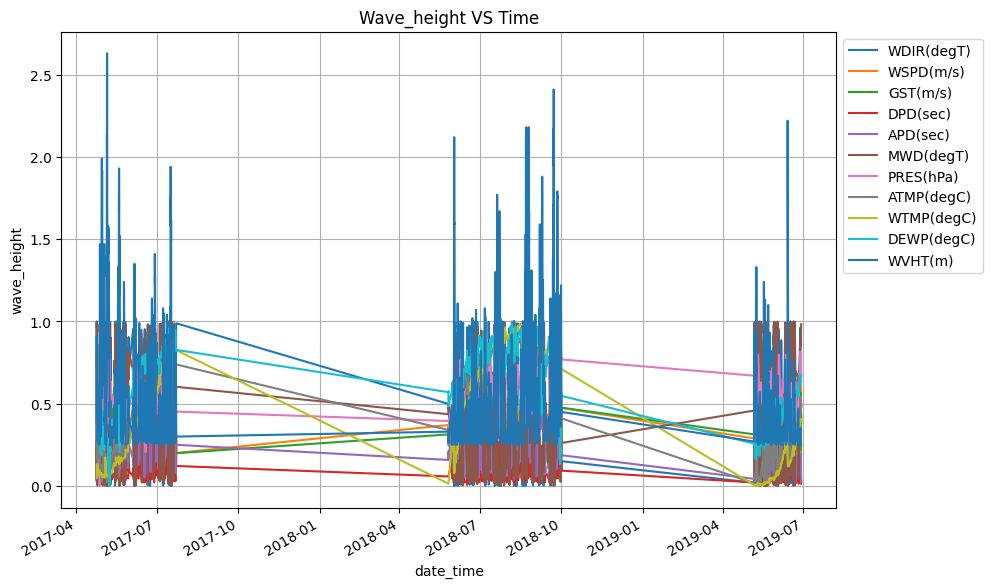

In [32]:
sam_0= train_df_1_scaled.copy()
import matplotlib.pyplot as plt
sam_0.plot(figsize=(10,7))
plt.title("Wave_height VS Time")
plt.grid()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.ylabel("wave_height");

In [33]:
sam_1= sam_0[["WVHT(m)"]]
sam_1.head(3)

,WVHT(m)
date_time,
2017-04-24 01:50:00,0.39
2017-04-24 02:50:00,0.65
2017-04-24 03:50:00,0.90


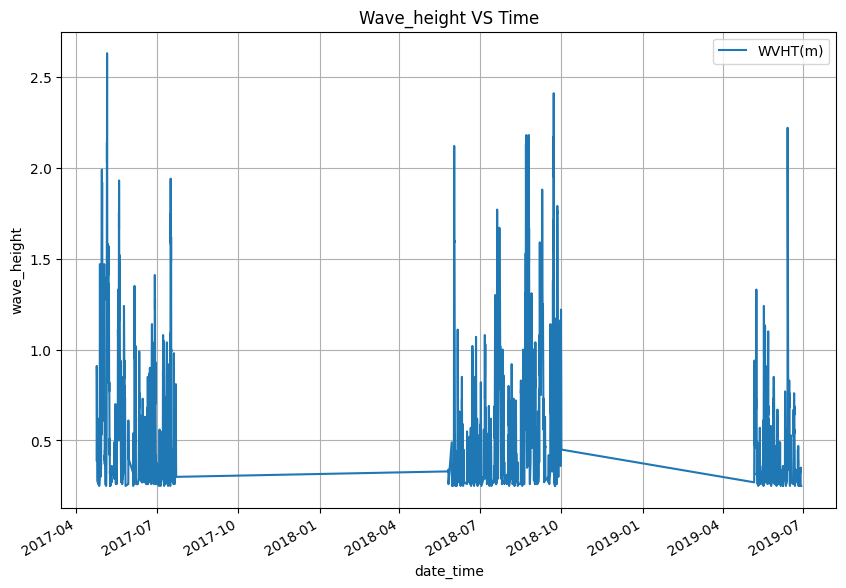

In [34]:
import matplotlib.pyplot as plt
sam_1.plot(figsize=(10,7))
plt.title("Wave_height VS Time")
plt.grid()
plt.ylabel("wave_height");

In [35]:
WINDOW_SIZE=1
HORIZON=1

**Making Windows**

In [36]:
train_window_df= train_df_1_scaled.copy()
for i in range(WINDOW_SIZE):
  train_window_df[f"WVHT(m)+{i+1}"]=train_df_1_scaled["WVHT(m)"].shift(periods=i+1)

train_window_df.head(10)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m),WVHT(m)+1
date_time,,,,,,,,,,,,
2017-04-24 01:50:00,0.061281,0.222222,0.204819,0.132546,0.298851,0.969444,0.701299,0.053942,0.073394,0.301471,0.39,NaN
2017-04-24 02:50:00,0.080780,0.214815,0.186747,0.204068,0.551724,0.994444,0.693506,0.049793,0.059633,0.297794,0.65,0.39
2017-04-24 03:50:00,1.000000,0.162963,0.138554,0.244751,0.718391,0.030556,0.680519,0.049793,0.055046,0.301471,0.90,0.65
2017-04-24 04:50:00,0.986072,0.185185,0.174699,0.244751,0.764368,0.063889,0.675325,0.049793,0.050459,0.301471,0.91,0.90
2017-04-24 05:50:00,0.986072,0.259259,0.259036,0.269029,0.772989,0.072222,0.680519,0.045643,0.050459,0.294118,0.88,0.91
2017-04-24 06:50:00,0.066852,0.192593,0.180723,0.269029,0.798851,0.047222,0.664935,0.041494,0.050459,0.294118,0.87,0.88
2017-04-24 07:50:00,0.086351,0.125926,0.126506,0.296588,0.709770,0.047222,0.657143,0.045643,0.050459,0.301471,0.80,0.87
2017-04-24 08:50:00,0.969359,0.096296,0.084337,0.296588,0.721264,0.080556,0.649351,0.049793,0.050459,0.305147,0.75,0.80
2017-04-24 09:50:00,0.066852,0.170370,0.144578,0.269029,0.772989,0.047222,0.651948,0.058091,0.050459,0.305147,0.83,0.75


In [37]:
full_windows =train_window_df.dropna().drop("WVHT(m)", axis=1).astype(np.float32)
full_windows.head(2)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)+1
date_time,,,,,,,,,,,
2017-04-24 02:50:00,0.08078,0.214815,0.186747,0.204068,0.551724,0.994444,0.693506,0.049793,0.059633,0.297794,0.39
2017-04-24 03:50:00,1.00000,0.162963,0.138554,0.244751,0.718391,0.030556,0.680519,0.049793,0.055046,0.301471,0.65


In [38]:
full_windows.tail(7)

,WDIR(degT),WSPD(m/s),GST(m/s),DPD(sec),APD(sec),MWD(degT),PRES(hPa),ATMP(degC),WTMP(degC),DEWP(degC),WVHT(m)+1
date_time,,,,,,,,,,,
2019-06-26 09:40:00,0.679666,0.281481,0.246988,0.101706,0.209770,0.530556,0.600000,0.385892,0.302752,0.588235,0.30
2019-06-28 00:40:00,0.963788,0.296296,0.289157,0.038714,0.086207,0.897222,0.815584,0.473029,0.408257,0.650735,0.25
2019-06-28 01:40:00,0.275766,0.607407,0.566265,0.077428,0.172414,0.883333,0.740260,0.502075,0.408257,0.665441,0.35
2019-06-28 02:40:00,0.231198,0.229630,0.240964,0.093176,0.132184,0.844444,0.709091,0.543568,0.399083,0.669118,0.34
2019-06-28 03:40:00,0.467967,0.148148,0.216867,0.085302,0.169540,0.888889,0.740260,0.489627,0.403670,0.639706,0.33
2019-06-28 04:40:00,0.562674,0.311111,0.283133,0.101706,0.192529,0.861111,0.745455,0.460581,0.403670,0.636029,0.35
2019-06-28 18:40:00,0.479109,0.437037,0.421687,0.013123,0.022989,0.983333,0.683117,0.493776,0.399083,0.672794,0.25


In [39]:
full_horizons= train_window_df.dropna()["WVHT(m)"].astype(np.float32)
full_horizons.head(2)

date_time
2017-04-24 02:50:00    0.65
2017-04-24 03:50:00    0.90
Name: WVHT(m), dtype: float32

**Train_test_split**

In [40]:
split=int(.8*len(train_df_1_scaled))
train_windows, test_windows= full_windows[:split], full_windows[split:]
train_horizons, test_horizons= full_horizons[:split], full_horizons[split:]
train_windows.shape, train_horizons.shape

((3108, 11), (3108,))

In [41]:
train_dataset=tf.data.Dataset.from_tensor_slices((train_windows, train_horizons)).batch(512).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_windows, test_horizons)).batch(512).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>)

**Model_RNN**

In [42]:
inputs=tf.keras.layers.Input((10+WINDOW_SIZE,))
x=tf.keras.layers.Dense(64, activation="relu")(inputs)
x=tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x=tf.keras.layers.LSTM(best_u1, return_sequences=True)(x)
x=tf.keras.layers.GRU(best_u2, return_sequences=True)(x)
x=tf.keras.layers.LSTM(best_u3, return_sequences=True)(x)
x=tf.keras.layers.GRU(best_u4, return_sequences=True)(x)
x=tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(best_u5))(x)
outputs=tf.keras.layers.Dense(1, activation="linear")(x)

model_rnn=tf.keras.Model(inputs, outputs, name="RNN")

model_rnn.compile(loss="mse",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

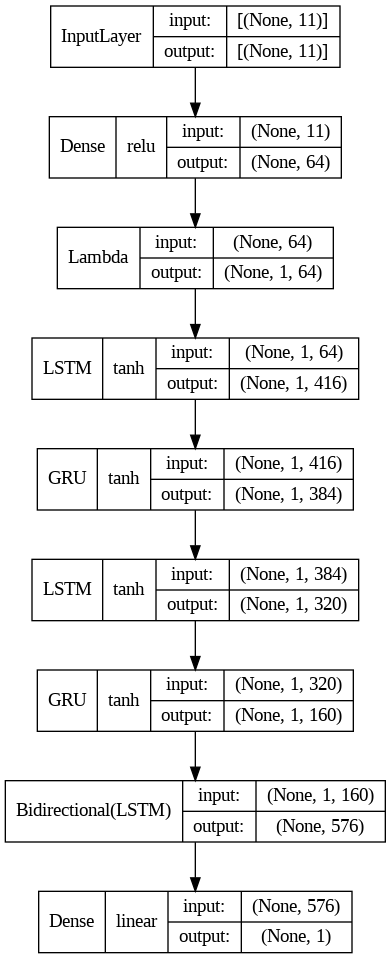

In [43]:
tf.keras.utils.plot_model(model_rnn, show_shapes=True, show_layer_names=False, show_layer_activations= True)

In [44]:
history_rnn=model_rnn.fit(train_dataset,
                      epochs=1000,
                      verbose=0,
                      validation_data=(test_dataset),
                      shuffle=False,
                      callbacks=[early_stop(),
                                 reduce_lr()])

model_rnn.evaluate(test_dataset)

2/2 [==============================] - 0s 11ms/step - loss: 0.0074 - root_mean_squared_error: 0.0860


[0.007397971581667662, 0.08601146191358566]

In [45]:
# making predictions
import os

files=os.listdir(path)
def rnn_pred(model, df_test, df_previous=train_df_1_scaled.copy(), path=path, file_name=files[1]):
  
  results=[]
  labels=np.array(df_previous["WVHT(m)"].values)
  df_previous=df_previous.drop(["WVHT(m)"], axis=1)
  window_h=np.array(labels[-WINDOW_SIZE:])                     #previous heights
  window_h=np.expand_dims(window_h, axis=0)
  for i in range(len(df_test)):
    window_p=np.array(df_test.iloc[i].values)     #parameters
    window_p=np.expand_dims(window_p, axis=0)
    window= np.concatenate((window_p, window_h), axis=1)

    #data=np.expand_dims(window, axis=0)
    data=window
    y_pred= model.predict(data).squeeze()
    results.append(y_pred)
    window_h=np.append(window_h, y_pred)
    window_h=np.delete(window_h, 0)
    window_h=np.expand_dims(window_h, axis=0)

  return results

In [46]:
from sklearn.metrics import mean_squared_error
def rnn_eval(model):
  results=[]
  df=train_df_1_scaled.copy()
  split=int(0.8*len(df))
  df_previous=train_df_1_scaled.copy()
  df_previous=df_previous.drop(["WVHT(m)"], axis=1)
  labels=np.array(df["WVHT(m)"].values)
  window_h=np.array(labels[split-WINDOW_SIZE:split])                     #previous heights
  window_h=np.expand_dims(window_h, axis=0)
  for i in range(len(test_labels)):
   window_p=np.array(df_previous.iloc[split+i].values)     #parameters
   window_p=np.expand_dims(window_p, axis=0)
   window= np.concatenate((window_p, window_h), axis=1)
   
   data=window
   y_pred= model.predict(data).squeeze()
   results.append(y_pred)
   window_h=np.append(window_h, y_pred)
   window_h=np.delete(window_h, 0)
   window_h=np.expand_dims(window_h, axis=0)
  
  results=np.array(results)
  mse= mean_squared_error(np.array(test_labels.values).squeeze(), results.squeeze())
  rmse= mse**0.5
  return results, rmse

**Plotting the results**

In [47]:
results, rmse=rnn_eval(model_rnn)
print("\n\nRMSE: ",rmse) #RMSE:  0.1875676900831216 horizon=12

1/1 [==============================] - 0s 21ms/step


RMSE:  0.17091829409894843


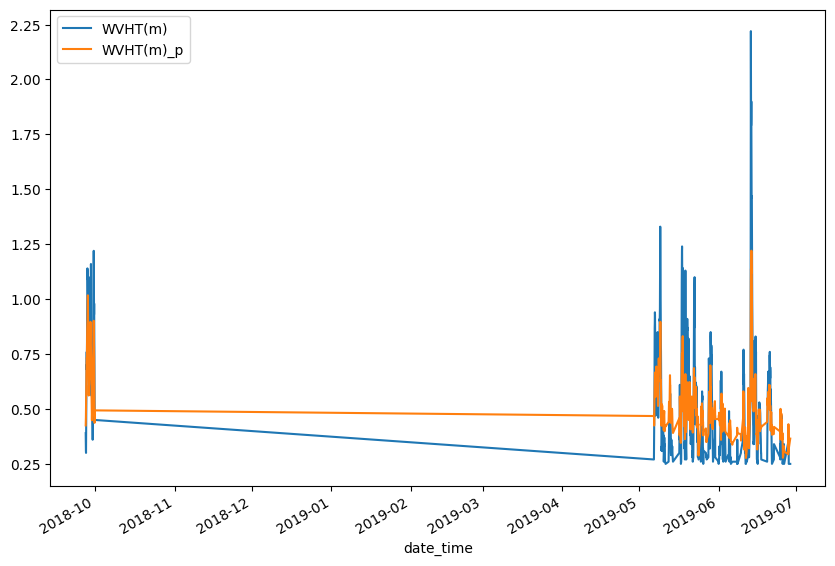

In [48]:
plot(results)

**Model_NBeats**

In [49]:
WINDOW_SIZE_n=10+WINDOW_SIZE

In [72]:
N_EPOCHS=5000
N_NEURONS=512
N_LAYERS=8
N_STACKS=30

INPUT_SIZE=WINDOW_SIZE_n*HORIZON
THETA_SIZE=WINDOW_SIZE_n+HORIZON

In [73]:
#create NBeats custom layer

class nbeats_block(tf.keras.layers.Layer):
  def __init__(self, input_size: int,
             theta_size: int, horizon: int,
             n_neurons: int, n_layers: int, **kwargs):
    super().__init__(**kwargs)
    self.input_size= input_size
    self.theta_size= theta_size
    self.horizon= horizon
    self.n_neurons= n_neurons
    self.n_layers= n_layers

    #block contains a stack of 4 fully connected layers with relu activation
    self.hidden=[tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    #output of the block is a theta layer with linear activation
    self.theta_layer=tf.keras.layers.Dense(theta_size, activation="linear")

  def call(self, inputs):
    x=inputs
    for layer in self.hidden:
      x=layer(x)
    theta=self.theta_layer(x)

    #output the backcast and forecast from theta
    backcast, forecast=theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast, forecast

In [ ]:
%%time

#1 initialising the nbeats block
nbeats_block_layer=nbeats_block(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS, name="initial_block")

#2 creating input layer
stack_input=tf.keras.layers.Input((WINDOW_SIZE_n,), name="input")

#experimentation
x=tf.keras.layers.Dense(best_u1, activation="relu")(stack_input[:(WINDOW_SIZE_n-WINDOW_SIZE)])
x=tf.keras.layers.Dense(best_u2, activation="relu")(x)
x=tf.keras.layers.Dense(best_u3, activation="relu")(x)
x=tf.keras.layers.Dense(best_u4, activation="relu")(x)
x=tf.keras.layers.Dense(best_u5, activation="relu")(x)
stack_input=tf.keras.layers.Dense(WINDOW_SIZE_n, activation="relu")(x)

#3 top layer ie. initial forecast and backcast
backcast, forecast=nbeats_block_layer(stack_input)

#4 initial residual connection
residual= tf.keras.layers.subtract([stack_input, backcast], name="subtract_00")

#5 create the stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): #since the first one is already created
  block_backcast, block_forecast=nbeats_block(input_size=INPUT_SIZE,
                                theta_size=THETA_SIZE,
                                horizon=HORIZON,
                                n_neurons=N_NEURONS,
                                n_layers=N_LAYERS, name=f"block_{i}")(residual)

#6 double residual stacking
  residuals=tf.keras.layers.subtract([residual, block_backcast], name=f"subtract_{i}")
  forecast=tf.keras.layers.add([forecast, block_forecast], name=f"add_{i}")

#7 create model_7
model_nbeats=tf.keras.Model(stack_input, forecast, name="NBeats")

#8 compile
model_nbeats.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

#9 fit
history_nbeats= model_nbeats.fit(train_dataset,
                       validation_data=(test_dataset),
                       epochs=N_EPOCHS,
                       shuffle=False,
                       verbose=0,
                       callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



In [ ]:
model_nbeats.evaluate(test_dataset)

In [ ]:
tf.keras.utils.plot_model(model_nbeats)

**Plotting the results**

In [ ]:
results, rmse=rnn_eval(model_nbeats)
print("\n\nRMSE: ",rmse) #RMSE:  0.12796834155103576 -window=12 0.09437978128527184 -window=11

In [ ]:
plot(results)

#**Submission** 

In [57]:
from google.colab import files

def download(model):
    files.download(f"{model.name}.csv")

In [58]:
files=os.listdir(path)

def submission(model, path=path, file_name=files[1]):
  loc=path+"/"+file_name
  data=pd.read_csv(loc)
  index=data["ID"].values
  data_df=data.drop(["ID"], axis=1)

  date_time=data_df[["#YY", "MM", "DD", "hh", "mm"]].values
  y, m, d, h, min=[], [], [], [], []

  for i in date_time:
    y.append(i[0])
    m.append(i[1])
    d.append(i[2])
    h.append(i[3])
    min.append(i[4])

  y, m, d, h, min=np.array(y), np.array(m), np.array(d), np.array(h), np.array(min)

  
  date_time_col=[]
  for i in range(len(y)):
    date_time_col.append(datetime(y[i], m[i], d[i], h[i], min[i]))

  date_time_col=np.array(date_time_col)
  data_df["date_time"]= date_time_col
  data_df=data_df.drop(["#YY", "MM", "DD", "hh", "mm"], axis=1)
  data_df=data_df.set_index("date_time")
  data_df_scaled= scale(data_df)
  pred=np.array(model.predict(data_df_scaled).squeeze())

  df_dict={"ID":index, "WVHT(m)":pred}
  submission_df=pd.DataFrame(df_dict)
  submission_df.to_csv(f"{model.name}.csv", encoding = 'utf-8-sig')
  download(model)

In [59]:
files=os.listdir(path)
files

['sample2.csv', 'test1.csv', 'train.csv']

In [60]:
def submission_t(model, path=path, file_name=files[1]):
  files=os.listdir(path)
  loc=path+"/"+file_name
  data=pd.read_csv(loc)
  index=data["ID"].values
  data_df=data.drop(["ID"], axis=1)
  date_time=data_df[["#YY", "MM", "DD", "hh", "mm"]].values
  y, m, d, h, min=[], [], [], [], []

  for i in date_time:
    y.append(i[0])
    m.append(i[1])
    d.append(i[2])
    h.append(i[3])
    min.append(i[4])

  y, m, d, h, min=np.array(y), np.array(m), np.array(d), np.array(h), np.array(min)

  
  date_time_col=[]
  for i in range(len(y)):
    date_time_col.append(datetime(y[i], m[i], d[i], h[i], min[i]))

  date_time_col=np.array(date_time_col)
  data_df["date_time"]= date_time_col
  data_df=data_df.drop(["#YY", "MM", "DD", "hh", "mm"], axis=1)
  data_df=data_df.set_index("date_time")
  data_df_scaled= scale(data_df)

  results=rnn_pred(model, data_df_scaled)
  pred= np.array(results)

  df_dict={"ID":index, "WVHT(m)":pred}
  submission_df=pd.DataFrame(df_dict)
  submission_df.to_csv(f"{model.name}.csv")
  download(model)

In [61]:
submission(model_mlp_best)

48/48 [==============================] - 0s 2ms/step


AttributeError: ignored

In [ ]:
submission_t(model_rnn)

In [71]:
submission_t(model_nbeats)

1/1 [==============================] - 0s 23ms/step


AttributeError: ignored